<a href="https://colab.research.google.com/github/ansariwaleed/self_attention_and_transformer/blob/main/self_attention_implementaion_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this is implementation of this video - https://www.youtube.com/watch?v=ZPLym9rJtM8

Implementing the Self - attention Mechanism from scratch in PyTorch.

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Attention(nn.Module):
    def __init__(self, d_in, d_out):
      super().__init__()
      self.d_in = d_in
      self.d_out = d_out
      self.Q = nn.Linear(d_in, d_out)
      self.K = nn.Linear(d_in, d_out)
      self.V = nn.Linear(d_in, d_out)

    def forward(self, x):
      queries = self.Q(x)
      keys = self.K(x)
      values = self.V(x)
      scores = torch.bmm(queries, keys.transpose(1,2)) #bmm stands for batch matrix multiplication.
      scores = scores/(self.d_out ** 0.2)
      attention = F.softmax(scores, dim = 2)
      hidden_stated =  torch.bmm(attention, values)
      return hidden_stated

In [22]:
SOS_token = 0
EOS_token = 1

index2words = {
    SOS_token: "SOS",
    EOS_token: "EOS"
}

words = "How are you doing ? I am good and you ?"
words_list = set(words.lower().split(' '))
for word in words_list:
  index2words[len(index2words)] = word

index2words

{0: 'SOS',
 1: 'EOS',
 2: 'doing',
 3: 'are',
 4: '?',
 5: 'i',
 6: 'am',
 7: 'and',
 8: 'how',
 9: 'good',
 10: 'you'}

In [23]:
#inverted the imdex
words2index = {w: i for i, w in index2words.items()}
words2index

{'SOS': 0,
 'EOS': 1,
 'doing': 2,
 'are': 3,
 '?': 4,
 'i': 5,
 'am': 6,
 'and': 7,
 'how': 8,
 'good': 9,
 'you': 10}

In [24]:
#funtion to convert the words in tensors
def convert2tensors(sentence):
  words_list = sentence.lower().split(' ')
  indexes = [words2index[word] for word in words_list]
  return torch.tensor(indexes, dtype = torch.long).view(1,-1)

sentence = "How are you doing ?"
indexes = convert2tensors(sentence)

indexes.size()

torch.Size([1, 5])

In [25]:
# lets now create a very small neural network to understand what is happening with this attention layer
HIDDEN_SIZE = 10
VOCAB_SIZE = len(words2index)

embedding = nn.Embedding(VOCAB_SIZE, HIDDEN_SIZE)
attention = Attention(HIDDEN_SIZE, HIDDEN_SIZE)

sentence = "How are you doing ?"
input_tensor = convert2tensors(sentence)

embedded = embedding(input_tensor)
embedded

tensor([[[-1.0434, -0.3815,  0.3707,  0.2588, -0.7210, -0.6069, -0.9375,
          -1.0619,  0.7088, -0.3966],
         [ 0.8852, -0.1778, -0.7007, -0.8887,  0.6916, -0.1492, -0.2000,
          -0.3927,  0.2059, -1.2361],
         [-2.6694,  0.9975, -1.6627, -0.3655, -1.6179, -0.1837,  0.6589,
          -1.4702,  1.2794, -1.7770],
         [-0.3591, -1.1265, -0.9088, -1.1264,  1.0296,  1.6648,  0.5465,
          -0.8868,  0.1048, -0.6253],
         [-1.2097,  0.5776, -0.5922, -0.5938, -1.4709,  1.6457,  1.2018,
           0.8958, -1.2533,  0.7224]]], grad_fn=<EmbeddingBackward0>)

In [26]:
embedded.size()

torch.Size([1, 5, 10])

1 is the dimensonallity of the batch, 5 is the no of token in the input sequence  & 10 is the no. of elememts ineach of the different vectors which we have

In [27]:
hidden_state = attention(embedded)

In [28]:
hidden_state

tensor([[[-0.1443,  0.8333,  0.4573, -0.4115,  0.1151, -0.3583,  0.2708,
          -0.4793,  0.5495,  0.4266],
         [-0.1693,  0.8078,  0.4288, -0.3816,  0.0561, -0.3127,  0.2681,
          -0.3947,  0.4566,  0.4647],
         [-0.0310,  0.8143,  0.5136, -0.4297,  0.1974, -0.3349,  0.2796,
          -0.5670,  0.5582,  0.2898],
         [-0.1336,  0.7891,  0.3948, -0.3879,  0.0612, -0.3477,  0.2424,
          -0.5233,  0.5829,  0.3332],
         [-0.2017,  0.7148,  0.2603, -0.2947, -0.0630, -0.4044,  0.2380,
          -0.4692,  0.5857,  0.3737]]], grad_fn=<BmmBackward0>)

In [29]:
hidden_state.size() # size will be same as embedded tesor

torch.Size([1, 5, 10])

In [30]:
d_in = HIDDEN_SIZE
d_out = HIDDEN_SIZE
Q = nn.Linear(d_in, d_out)
K = nn.Linear(d_in, d_out)
V = nn.Linear(d_in, d_out)

In [31]:
queries = Q(embedded)
keys = K(embedded)
values = V(embedded)

In [35]:
queries.size(), keys.size(), values.size()

(torch.Size([1, 5, 10]), torch.Size([1, 5, 10]), torch.Size([1, 5, 10]))

In [36]:
scores = torch.bmm(queries, keys.transpose(1,2))
scores.size()

torch.Size([1, 5, 5])

1 is batch dimensinalty and 5 is no of input sequence, so we have a sqaure matrix

In [37]:
scores = scores/(d_out ** 0.2)
attention = F.softmax(scores, dim = 2)

In [39]:
attention.size()

torch.Size([1, 5, 5])

In [40]:
attention.sum(dim = 2)

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000]], grad_fn=<SumBackward1>)

each row has output one shows that softmax gives probablity

In [41]:
attention

tensor([[[0.1105, 0.1841, 0.1782, 0.1556, 0.3716],
         [0.2725, 0.2144, 0.1542, 0.2287, 0.1303],
         [0.2363, 0.2324, 0.1365, 0.2153, 0.1795],
         [0.3623, 0.2081, 0.1902, 0.1288, 0.1107],
         [0.1331, 0.1309, 0.5378, 0.1081, 0.0902]]],
       grad_fn=<SoftmaxBackward0>)

In [42]:
hidden_states = torch.bmm(attention, values)

In [43]:
hidden_state.size()

torch.Size([1, 5, 10])

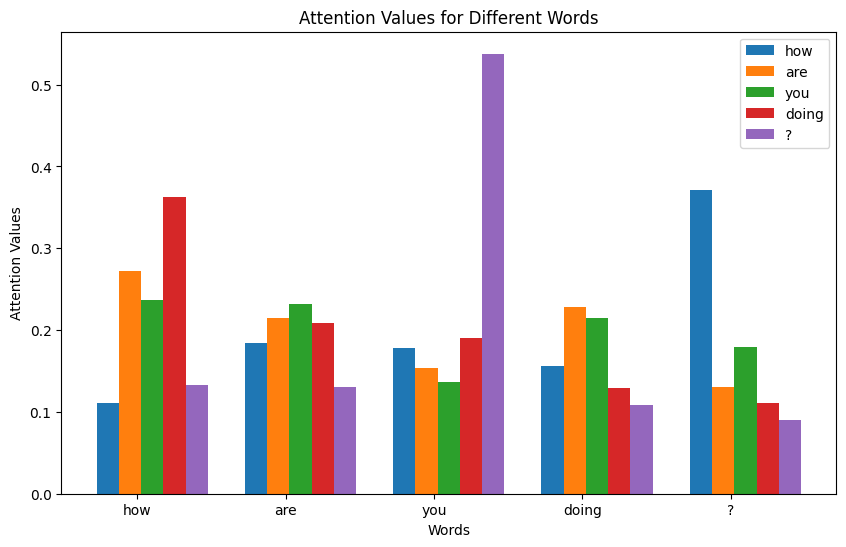

In [45]:
#bar plot of the attention values of different words

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'attention' is the attention matrix from the provided code
# attention.size() should be (1, 5, 5)

# Extract attention values
attention_values = attention.detach().numpy()[0]

# Get the words corresponding to the attention values
words = list(words2index.keys())
words = [words[i] for i in input_tensor.detach().numpy()[0]]


# Create the bar plot
plt.figure(figsize=(10, 6))
for i in range(len(words)):
    plt.bar(np.arange(len(words)) + i * 0.15, attention_values[i], width=0.15, label=words[i])

plt.xticks(np.arange(len(words)) + 0.2, words)
plt.xlabel("Words")
plt.ylabel("Attention Values")
plt.title("Attention Values for Different Words")
plt.legend()
plt.show()


what this bar plot telling ?

The bar plot visualizes the attention weights assigned to each word in the input sentence "How are you doing?" by the self-attention mechanism.  Each group of bars represents a word in the sentence, and the height of each bar within a group indicates the attention weight given to that word when processing the word represented by the group.

For example:

* **High Attention Weight:** A tall bar for a given word in a group signifies that the model paid significant attention to that specific word when generating the representation for the word representing the group.  This suggests a strong relationship or dependence between the two words.

* **Low Attention Weight:**  A short bar indicates low attention, implying a weaker relationship.

* **Self-Attention:**  Notice the bars within each group.  A word will always have some attention to itself (though not always the highest).  The other bars in the group show how much the model is attending to *other* words when processing that word.  This is the key aspect of self-attention.

**In summary:** The plot reveals how each word in the sentence relates to other words in context.  Words with high mutual attention are likely semantically related or important to the overall meaning of the sentence.  The plot provides a way to interpret how the attention mechanism is focusing on different parts of the input sequence.
